In [4]:
import duckdb
import matplotlib.pyplot as plt

duckdb_path = "data/sakila.duckdb"

In [ ]:
with duckdb.connect(duckdb_path) as conn:
    # SUM amout to use JOIN payment to show customer
    df_top_customers = conn.sql("""
    SELECT 
        c.first_name || '' || c.last_name AS customer,
        SUM(p.amount) AS total_spend
    FROM customer c
    JOIN payment p ON c.customer_id = p.customer_id
    GROUP BY customer
    ORDER BY total_spend DESC
    LIMIT 5;
    """).df()

df_top_customers.plot(kind = 'bar', x = 'customer', y = 'total_spend', figsize = (9,5))
plt.title("Top 5 customers by total spend")
plt.xlabel("Customer")
plt.ylabel("Total spend")
plt.show()

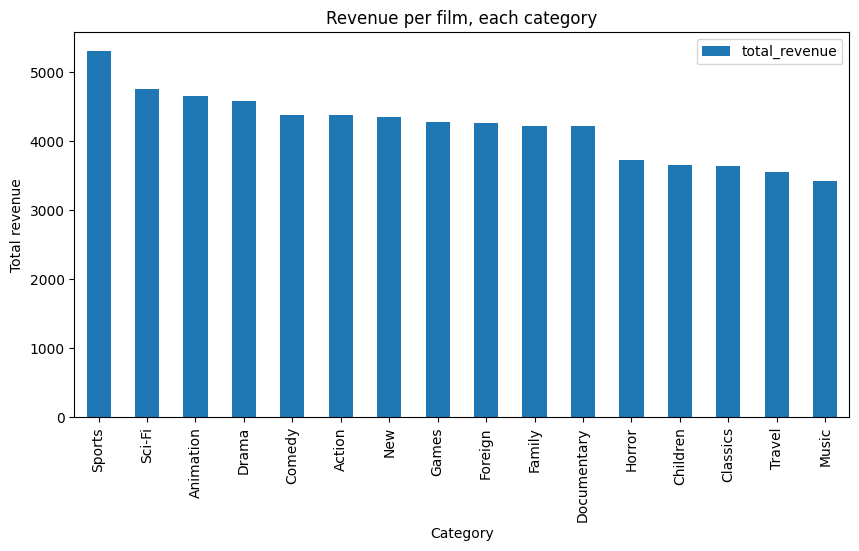

In [ ]:
with duckdb.connect(duckdb_path) as conn:
    # SUM amount payment per category
    # Using hint
    df_revenue_category = conn.sql("""
    SELECT
        c.name AS category,
        SUM(p.amount) AS total_revenue
    FROM category c
    JOIN film_category fc ON c.category_id = fc.category_id
    JOIN film f ON fc.film_id = f.film_id
    JOIN inventory i ON f.film_id = i.film_id
    JOIN rental r ON i.inventory_id = r.inventory_id
    JOIN payment p ON r.rental_id = p.rental_id
    GROUP BY category
    ORDER BY total_revenue DESC;
    """).df()

df_revenue_category.plot(kind = 'bar', x = 'category', y = 'total_revenue', figsize = (10,5))
plt.title("Revenue per film, each category")
plt.xlabel("Category")
plt.ylabel("Total revenue")
plt.show()